<a href="https://colab.research.google.com/github/akhileshmanukonda/7PAM2000-VISUALISATION-ASSIGNMENT/blob/main/kaggle_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
# Load the data


train_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0509-2023-group-23/kaggle-challenge/main/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0509-2023-group-23/kaggle-challenge/main/test.csv')

# Display the first few rows of the training dataset
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Preprocessing

## Handle missing values

In [3]:
train_df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)

In [4]:
# Combine training and test sets
combined_df = pd.concat([train_df, test_df], sort=False)

# Encode categorical variables
le = LabelEncoder()
for column in ['HomePlanet', 'Destination', 'Cabin', 'Name']:
    combined_df[column] = le.fit_transform(combined_df[column].astype(str))

# Split the combined dataset back into training and test sets
train_df = combined_df.iloc[:len(train_df), :]
test_df = combined_df.iloc[len(train_df):, :]

# Verify the encoding
print(train_df.head())
print(test_df.head())

  PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01           1      False    208            2  39.0  False   
1     0002_01           0      False   3241            2  24.0  False   
2     0003_01           1      False      1            2  58.0   True   
3     0003_02           1      False      1            2  33.0  False   
4     0004_01           0      False   3243            2  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck   Name Transported  
0          0.0        0.0           0.0     0.0     0.0   7819       False  
1        109.0        9.0          25.0   549.0    44.0   6688        True  
2         43.0     3576.0           0.0  6715.0    49.0    669       False  
3          0.0     1283.0         371.0  3329.0   193.0  10688       False  
4        303.0       70.0         151.0   565.0     2.0  12400        True  
  PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01           0 

## Standardize numerical features

In [5]:
scaler = StandardScaler()
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

<ipython-input-5-e05ca29ae009>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
<ipython-input-5-e05ca29ae009>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[numerical_features] = scaler.transform(test_df[numerical_features])


# Exploratory Data Analysis (EDA)

In [14]:
## Plot distribution of numerical features with detailed explanations
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[feature], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(f"\nDescription of {feature}:")
    print(train_df[feature].describe())
    print("\n\n")

NameError: name 'numerical_features' is not defined

<ipython-input-11-203ca5be1e95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='Set2')


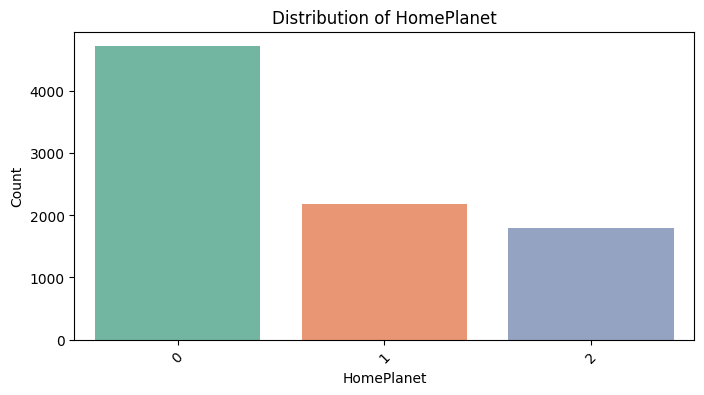


Description of HomePlanet:
HomePlanet
0    4720
1    2177
2    1796
Name: count, dtype: int64





<ipython-input-11-203ca5be1e95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='Set2')


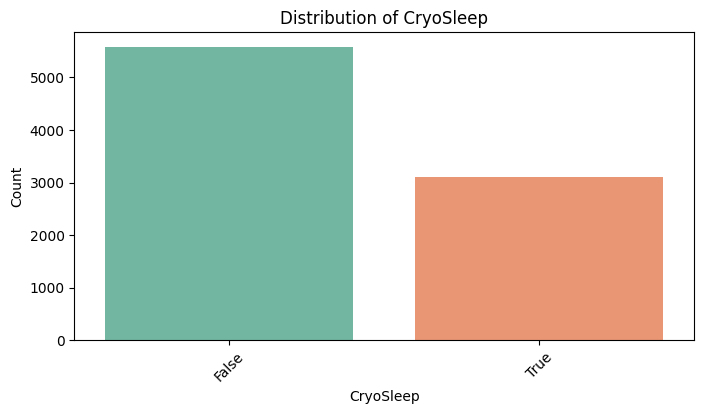


Description of CryoSleep:
CryoSleep
False    5582
True     3111
Name: count, dtype: int64





<ipython-input-11-203ca5be1e95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='Set2')


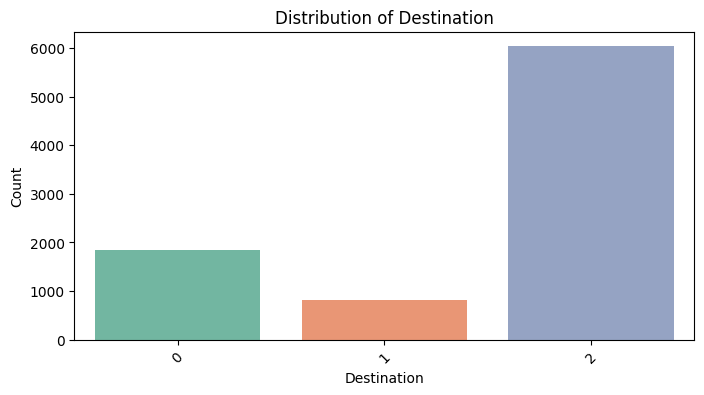


Description of Destination:
Destination
2    6037
0    1840
1     816
Name: count, dtype: int64





<ipython-input-11-203ca5be1e95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='Set2')


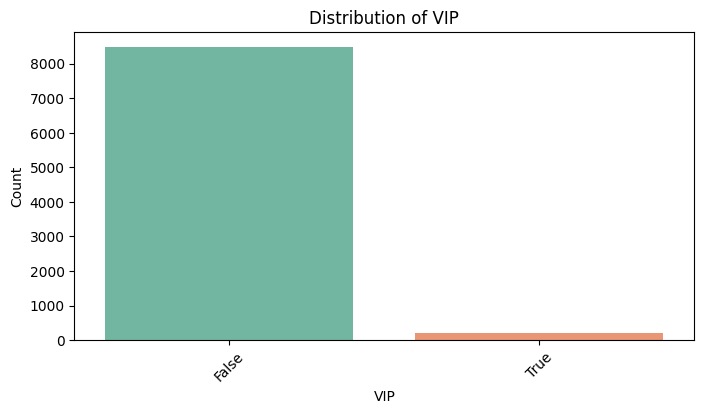


Description of VIP:
VIP
False    8489
True      204
Name: count, dtype: int64





In [11]:
## Analyze categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=feature, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print(f"\nDescription of {feature}:")
    print(train_df[feature].value_counts())
    print("\n\n")

In [12]:
## Analyze the relationship between features and target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x='Transported', y=feature, palette='Set3')
    plt.title(f'{feature} vs Transported')
    plt.xlabel('Transported')
    plt.ylabel(feature)
    plt.show()

NameError: name 'numerical_features' is not defined

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=feature, hue='Transported', palette='Set1')
    plt.title(f'{feature} vs Transported')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
## Correlation heatmap with enhanced details
plt.figure(figsize=(14, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
## Pairplot for numerical features
sns.pairplot(train_df[numerical_features + ['Transported']], hue='Transported', palette='husl', diag_kind='kde')
plt.show()

In [ ]:
# Analysis of missing values
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    plt.figure(figsize=(14, 8))
    missing_values.sort_values(inplace=True)
    missing_values.plot.bar()
    plt.title('Missing Values in Each Feature')
    plt.xlabel('Feature')
    plt.ylabel('Number of Missing Values')
    plt.show()
else:
    print("No missing values in the dataset.")

In [ ]:
## Summary statistics for the entire dataset
print("Summary Statistics for the Training Dataset:")
print(train_df.describe(include='all'))

In [ ]:
## Additional plots for insights
# Distribution of Age by HomePlanet
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='HomePlanet', y='Age', palette='Set2')
plt.title('Age Distribution by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Age')
plt.show()

In [ ]:
# Count of VIP status by HomePlanet
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='HomePlanet', hue='VIP', palette='Set1')
plt.title('Count of VIP Status by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Model Building

In [6]:
# Ensure the target variable 'Transported' is binary
train_df['Transported'] = train_df['Transported'].astype(int)

## Define features and target variable
X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

# Verify target variable
print(y.value_counts())

Transported
1    4378
0    4315
Name: count, dtype: int64


<ipython-input-6-4d135507c0f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Transported'] = train_df['Transported'].astype(int)


In [8]:
## Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

## Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

rf_grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
gb_grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')

In [9]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [10]:
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [11]:
## Evaluate models
rf_best_model = rf_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_

In [13]:
rf_predictions = rf_best_model.predict(X_val)
gb_predictions = gb_best_model.predict(X_val)

In [14]:
# Classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_val, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       861
           1       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [15]:
# Classification report for Gradient Boosting
print("Gradient Boosting Classification Report:")
print(classification_report(y_val, gb_predictions))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       861
           1       0.78      0.82      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



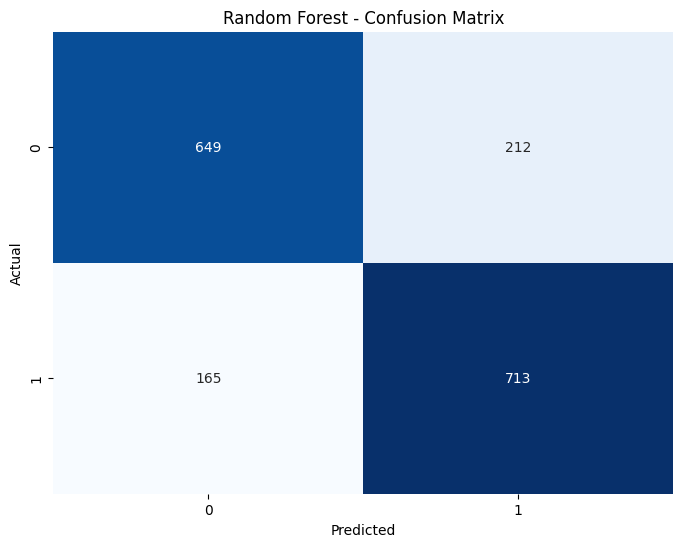

In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

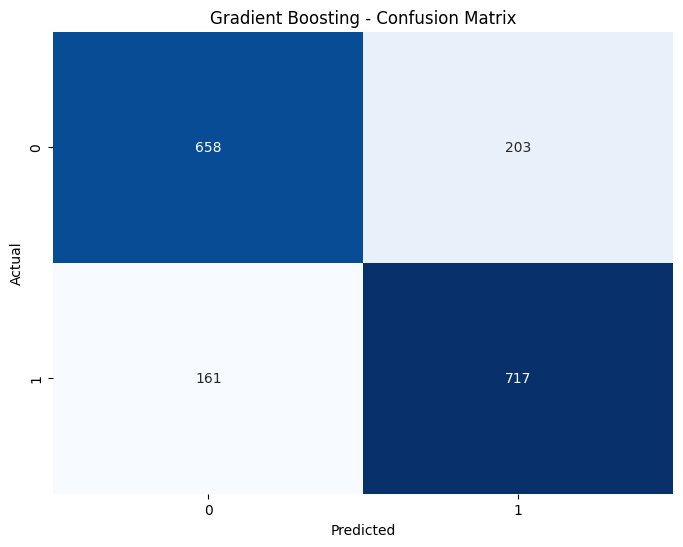

In [17]:
# Confusion Matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_val, gb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.4 MB/s eta 0:00:00


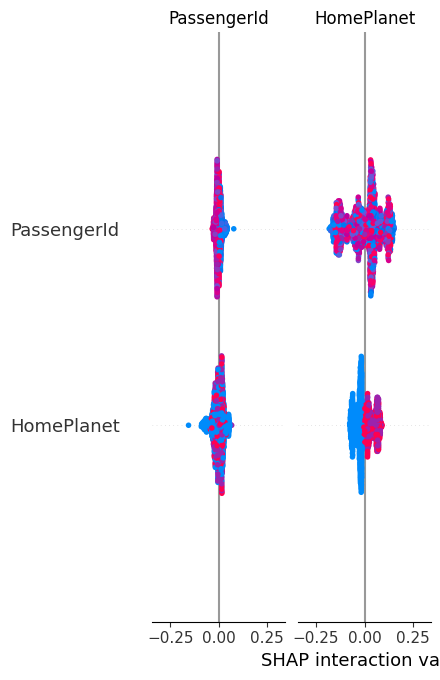

In [18]:
# Explainable AI (SHAP Values)
!pip install shap
import shap
explainer = shap.TreeExplainer(rf_best_model)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val, plot_type='bar')

In [19]:
# Ensure the 'Transported' column is not in the test set
test_df = test_df.drop(columns=['Transported'], errors='ignore')

# Kaggle Submission
test_predictions = rf_best_model.predict(test_df)
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': test_predictions})
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully.")


Submission file created successfully.
